### Elitism

Preserving fittest values for next iteration

In [1]:
from BasicGaAlgorithim import (
                                generate_population,
                                fitness_function,
                                selection,
                                crossover,
                                mutation,
                                check_for_perfect_genotype,
                                calculate_perfect_score
                            )

In [2]:
from OptimiseGaAlgorithim import (
                                elitism
)

population = generate_population(3, 12)
fit_scores = [fitness_function(genotype) for genotype in population]
elitism(population, fit_scores, 0.25, 12)

[[2, 0, 1], [0, 1, 1], [1, 0, 0]]

In [3]:
from OptimiseGaAlgorithim import (
                                remove_parent_pairs
)
    
population = generate_population(3, 12)
len(remove_parent_pairs(population, 0.25, 12))

9

In [4]:
def generation(population, size_of_population, number_of_queens, mutation_frequency, elitism_ratio):
    # b) fitness function
    fit_scores = [fitness_function(genotype) for genotype in population]

    # c) selection
    selected_pairs = selection(population, fit_scores, size_of_population)
    # make room for elites
    remove_selected_pairs = remove_parent_pairs(selected_pairs, elitism_ratio, size_of_population)
    
    # d) cross over
    children = crossover(remove_selected_pairs, number_of_queens)

    ##ELITISM
    elites = elitism(population, fit_scores, elitism_ratio, size_of_population)
    elite_children = elites + children

    fit_scores = [fitness_function(genotype) for genotype in elite_children]

    # e) mutation
    mutated = mutation(elite_children, mutation_frequency, number_of_queens)

    return mutated, fit_scores

# a) Initial Population
population = generate_population(3, 3)
generation(population, 3, 3, 2, 0.5)


([[2, 1, 2], [1, 0, 0], [2, 2, 2]], [1.0, 1.0, 1.0])

In [7]:
import timeit

NUMBER_OF_QUEENS=8
SIZE_OF_POPULATION=25
MUTATION_FREQUENCY = 8
# TODO HOW IS THIS CALCULATED
PERFECT_SCORE = calculate_perfect_score(NUMBER_OF_QUEENS)
ELITISM_RATIO = 0.25



def genetic_algorithm(population):

    start_time = timeit.default_timer()

    gen = 0
    completed_genotype = []

    # # g) check if it has found correct state and exit loop
    while not completed_genotype:
        population, fitness_scores = generation(population, SIZE_OF_POPULATION, NUMBER_OF_QUEENS, MUTATION_FREQUENCY, ELITISM_RATIO)
        completed_genotype = check_for_perfect_genotype(population, PERFECT_SCORE)
        gen += 1

        if gen == 100000:
            break

    stop_time = timeit.default_timer()

    return {
        "elapsed_time": stop_time - start_time,
        "number_of_generations": gen,
        "completed_state": completed_genotype
    }

# a) generate initial population
population = generate_population(NUMBER_OF_QUEENS, SIZE_OF_POPULATION)

ga_result = genetic_algorithm(population)

ga_result

{'elapsed_time': 0.3931393000000014,
 'number_of_generations': 137,
 'completed_state': [6, 1, 3, 0, 7, 4, 2, 5]}

In [20]:
# run algo on all test populations

import pickle

test_populations_name = 'test_populations_25'

with open(test_populations_name, 'rb') as f:
    test_population = pickle.load(f)

results = {
        "elapsed_time": [],
        "number_of_generations": [],
        "completed_state": []
}

for pop in test_population:

        ga_result = genetic_algorithm(population)

        results["elapsed_time"].append(ga_result["elapsed_time"])
        results["number_of_generations"].append(ga_result["number_of_generations"])
        results["completed_state"].append(ga_result["completed_state"])

        print(f"elapsed_time:")
        print(ga_result["elapsed_time"])
        print(f"number_of_generations:")
        print(ga_result["number_of_generations"])
        print(f"completed_state:")
        print(ga_result["completed_state"])
        print("=========================")


elapsed_time:
0.16755089999992379
number_of_generations:
83
completed_state:
[4, 6, 3, 0, 2, 7, 5, 1]
elapsed_time:
2.9400948999999628
number_of_generations:
1472
completed_state:
[2, 5, 3, 1, 7, 4, 6, 0]
elapsed_time:
0.7071624999999813
number_of_generations:
374
completed_state:
[2, 4, 1, 7, 5, 3, 6, 0]
elapsed_time:
0.3949162999999771
number_of_generations:
245
completed_state:
[4, 2, 0, 5, 7, 1, 3, 6]
elapsed_time:
2.697544599999901
number_of_generations:
1667
completed_state:
[2, 4, 6, 0, 3, 1, 7, 5]
elapsed_time:
0.09927489999995487
number_of_generations:
67
completed_state:
[1, 5, 7, 2, 0, 3, 6, 4]
elapsed_time:
0.3492072999999891
number_of_generations:
199
completed_state:
[4, 2, 7, 3, 6, 0, 5, 1]
elapsed_time:
0.8388777000000118
number_of_generations:
529
completed_state:
[2, 4, 1, 7, 5, 3, 6, 0]
elapsed_time:
2.356548699999962
number_of_generations:
1474
completed_state:
[4, 6, 1, 5, 2, 0, 7, 3]
elapsed_time:
6.501265100000069
number_of_generations:
2906
completed_state:
[1, 

In [14]:

for completed_state in results["completed_state"]:

    if fitness_function(completed_state) < 28:
        print(completed_state)


    elapsed_time  number_of_generations           completed_state
0       0.881044                    731  [6, 2, 7, 1, 4, 0, 5, 3]
1       1.808731                   1289  [3, 1, 4, 7, 5, 0, 2, 6]
2       0.480866                    397  [4, 0, 7, 5, 2, 6, 1, 3]
3       0.652925                    578  [1, 7, 5, 0, 2, 4, 6, 3]
4       0.760265                    637  [5, 1, 6, 0, 3, 7, 4, 2]
..           ...                    ...                       ...
95      0.168645                    137  [2, 4, 7, 3, 0, 6, 1, 5]
96      1.175558                    656  [2, 6, 1, 7, 4, 0, 3, 5]
97      1.672360                    855  [2, 6, 1, 7, 5, 3, 0, 4]
98      0.587036                    435  [3, 6, 0, 7, 4, 1, 5, 2]
99      0.629730                    360  [4, 1, 5, 0, 6, 3, 7, 2]

[100 rows x 3 columns]
mean_number_of_generations: 662.57
std_number_of_generations: 651.9681664007837
mean_elapsed_time: 0.9107588469999996
std_elapsed_time: 0.9770775370387488
over_30_seconds
Empty DataFra

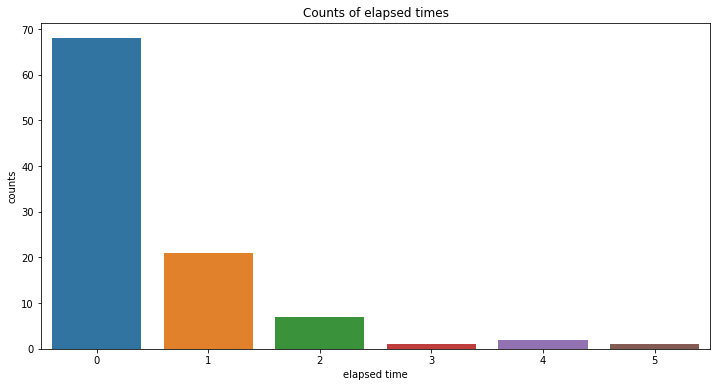

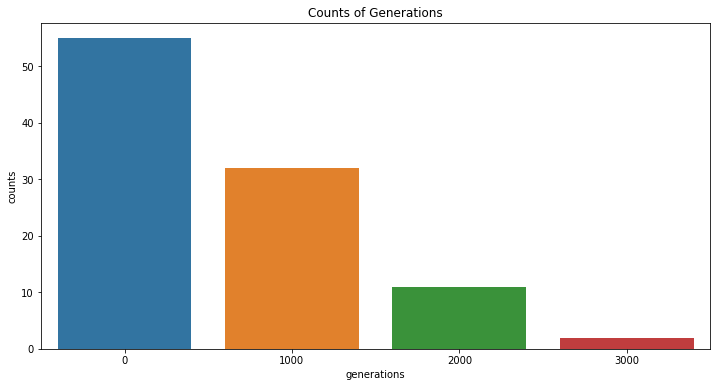

In [9]:
import os

unique_identifier = "100_25_population"
parent_directory = "C:\\Users\\SAB68\\repos\\samsambutdifferent\\eight-queen-problem\\results\\optimise-elite"

path = os.path.join(parent_directory, unique_identifier)

if not os.path.exists(path):
    os.mkdir(path)

config = {
    "NUMBER_OF_QUEENS": NUMBER_OF_QUEENS,
    "SIZE_OF_POPULATION": SIZE_OF_POPULATION,
    "MUTATION_FREQUENCY": MUTATION_FREQUENCY,
    "PERFECT_SCORE": PERFECT_SCORE,
    "test_file": test_populations_name
}

f = open(path + "\\config", "w")

for item in config.items():
    f.writelines(str(item) + '\n')
f.close()


import pandas as pd

results_df = pd.DataFrame(results)

mean_number_of_generations = results_df["number_of_generations"].mean()
mean_elapsed_time = results_df["elapsed_time"].mean()

std_number_of_generations = results_df["number_of_generations"].std()
std_elapsed_time = results_df["elapsed_time"].std()

print(results_df)

print(f"mean_number_of_generations: {mean_number_of_generations}")
print(f"std_number_of_generations: {std_number_of_generations}")
print(f"mean_elapsed_time: {mean_elapsed_time}")
print(f"std_elapsed_time: {std_elapsed_time}")


f = open(path + "\\metrics", "w")
f.writelines(f"mean_number_of_generations: {mean_number_of_generations}" + '\n')
f.writelines(f"std_number_of_generations: {std_number_of_generations}" + '\n')
f.writelines(f"mean_elapsed_time: {mean_elapsed_time}" + '\n')
f.writelines(f"std_elapsed_time: {std_elapsed_time}" + '\n')
f.writelines('\n')
f.write(str(results_df))
f.close()


# check all results finish
over_30_seconds = results_df[results_df["elapsed_time"] > 30]
f = open(path + "\\over_30_seconds", "w")
f.write(str(over_30_seconds))
f.close()
print("over_30_seconds")
print(over_30_seconds)


import math

def round_down_to_1000(x):
    return round(x, -3) 


floored_elapsed_time = results_df["elapsed_time"].apply(math.floor)
floored_number_of_generations = results_df["number_of_generations"].apply(round_down_to_1000)

frame = { 'elapsed_time': floored_elapsed_time, 'number_of_generations': floored_number_of_generations }

floored_results_df = pd.DataFrame(frame)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

fig = sns.barplot(x=floored_results_df.elapsed_time.value_counts().index, y=floored_results_df.elapsed_time.value_counts())

plt.xlabel("elapsed time")
plt.ylabel("counts")
plt.title("Counts of elapsed times")
plt.savefig(path + '/counts_of_elapsed_time.png')
plt.show(fig)

plt.figure(figsize=(12,6))

fig = sns.barplot(x=floored_results_df.number_of_generations.value_counts().index, y=floored_results_df.number_of_generations.value_counts())

plt.xlabel("generations")
plt.ylabel("counts")
plt.title("Counts of Generations")
plt.savefig(path + '/counts_of_generations.png')
plt.show(fig)
